In [16]:
import numpy as np

x = np.linspace(0,10,100)
y = np.linspace(0,10,100)
z = np.linspace(0,10,100)
noise = np.random.rand(100)
f = 1.5*x + 3.0*y + 4.5*z + noise + 6 # mock observed values

In [17]:
import sys
sys.path.append("/home/haricash/anaconda3/envs/cosmo-trc/lib/python3.9/site-packages/")

import emcee

In [18]:
# We first define a model we'd like to fit to our data
def model(params, var):
    a, b, c, d = params
    x, y, z = var
    return a*x + b*y + c*z + d

In [19]:
def log_likelihood(params, var, f, ferr):
    return -0.5*np.sum(((f - model(params, var))/ferr)**2)

In [20]:
def log_prior(params):
    a, b, c, d = params
    if (0 < a < 5) and (0 < b < 6) and (0 < c < 7) and (0 < d < 8):
        return 0.0
    else:
        return -np.inf

In [21]:
def log_prob(params, var, f, ferr):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    else:
        return lp + log_likelihood(params, var, f, ferr)

In [22]:
var = x, y, z
data = (var, f, noise) # a data holder
nwalkers = 32 # number of walkers
niter = 5000
initial = np.array([1, 2, 3, 4]) # this is the initial guess for our params
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)] # this is how we move from one 
# location to another - how to sample for each step

In [23]:
def main(p0,nwalkers,niter,ndim,log_prob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 500)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)
    
    print("Run Complete!")

    return sampler, pos, prob, state

In [24]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,log_prob,data)

Running burn-in...
Running production...
Run Complete!


In [13]:
import corner

In [14]:
samples = sampler.flatchain

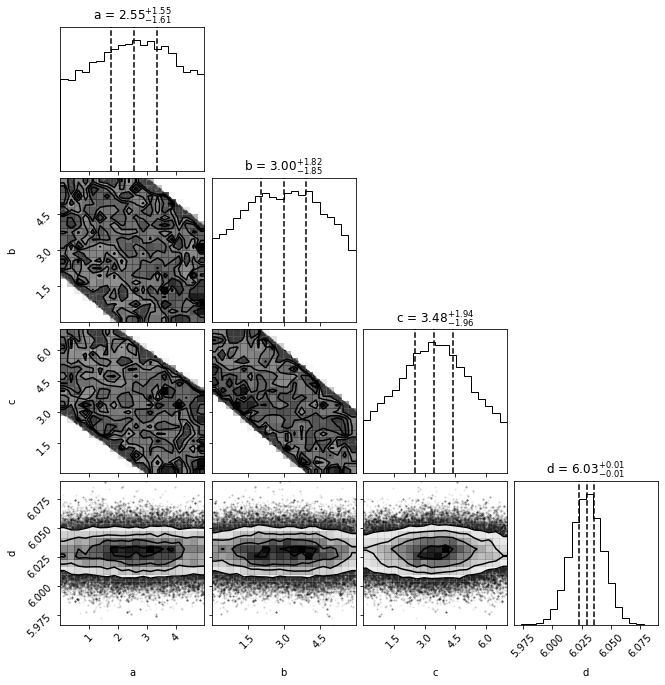

In [15]:
labels = ['a','b','c','d']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.32, 0.5, 0.68])